<a href="https://colab.research.google.com/github/mkg6573/Linear-Regression-from-scratch/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part E – Ridge and Lasso Regression**

**Objective**

To apply Ridge and Lasso regression from scratch to control overfitting and analyze the effect of regularization on model coefficients.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv("/content/after_EDA_dataset.csv")

x = df['proccessor_speed'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

m = len(x)


Polynomial Features

In [4]:
x2 = x ** 2

X = np.hstack((
    np.ones((m, 1)),
    x,
    x2
))


Initialize Parameters

In [5]:
theta = np.zeros((3, 1))


Ridge Regression (L2 Regularization)
Cost Function

J(θ)=1/2m​∑(hθ​(x)−y)^2+λ/2m​∑θ^2


In [9]:
##Ridge Gradient Descent
epochs = 8000
learning_rate = 0.01
lambda_ridge = 0.1

costs_ridge = []

for i in range(epochs):
    y_pred = X @ theta
    error = y_pred - y

    cost = (1/(2*m)) * np.sum(error**2) + (lambda_ridge/(2*m)) * np.sum(theta[1:]**2)
    costs_ridge.append(cost)

    gradient = (1/m) * (X.T @ error)
    gradient[1:] += (lambda_ridge/m) * theta[1:]

    theta = theta - learning_rate * gradient

theta_ridge = theta
theta_ridge


array([[-11223.30948487],
       [ -3310.55059973],
       [  6974.71061987]])

**Lasso Regression (L1 Regularization)**

Cost Function

J(θ)=1/2m​∑(hθ​(x)−y)^2+λ/m​∑∣θ∣


In [10]:
##Lasso Gradient Descent

theta = np.zeros((3, 1))
lambda_lasso = 0.05
costs_lasso = []

for i in range(epochs):
    y_pred = X @ theta
    error = y_pred - y

    cost = (1/(2*m)) * np.sum(error**2) + (lambda_lasso/m) * np.sum(np.abs(theta[1:]))
    costs_lasso.append(cost)

    gradient = (1/m) * (X.T @ error)
    gradient[1:] += (lambda_lasso/m) * np.sign(theta[1:])

    theta = theta - learning_rate * gradient

theta_lasso = theta
theta_lasso


array([[-8615.57673969],
       [-5090.94383683],
       [ 7264.48865847]])

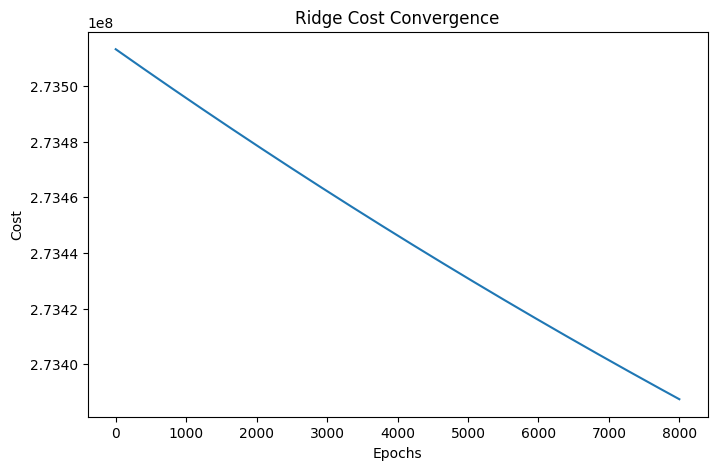

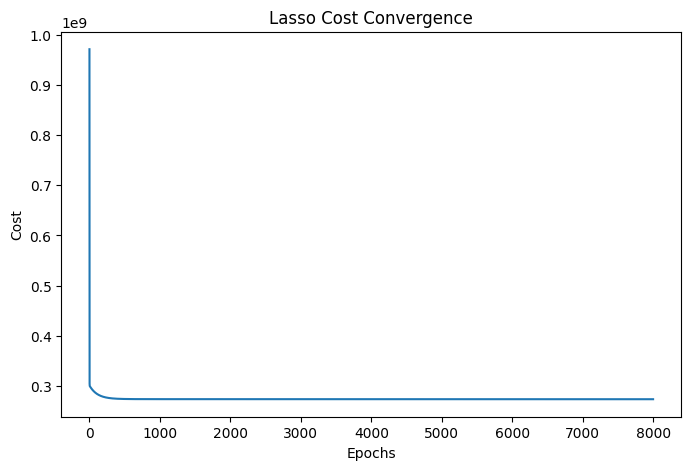

In [16]:
plt.figure(figsize=(8,5))
plt.plot(costs_ridge)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Ridge Cost Convergence")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(costs_lasso)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Lasso Cost Convergence")
plt.show()



In [12]:
coefficients = pd.DataFrame({
    "Model": ["Ridge", "Lasso"],
    "θ1 (x)": [theta_ridge[1][0], theta_lasso[1][0]],
    "θ2 (x²)": [theta_ridge[2][0], theta_lasso[2][0]]
})

coefficients


,Model,θ1 (x),θ2 (x²)
0,Ridge,-3310.550600,6974.710620
1,Lasso,-5090.943837,7264.488658


 **Observations**

Ridge Regression reduces coefficient magnitude but does not eliminate features.

Lasso Regression can shrink coefficients close to zero, performing feature selection.

Regularization helps prevent overfitting.

**Conclusion**

Ridge and Lasso Regression improve model generalization by penalizing large coefficients. Ridge controls overfitting, while Lasso additionally performs feature selection.